# Análisis del Comportamiento de Clientes en un Espacio de Trabajo y Estudio

In [19]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_consumos = pd.read_csv('data/consumos.csv')
df_tickets = pd.read_csv('data/tickets.csv')

In [3]:
df_consumos

,ticket_id,producto,precio
0,1,Té verde,2.8
1,1,Capuchino,3.2
2,1,Croissant,2.2
3,2,Sándwich,4.5
4,2,Café con leche,3.0
...,...,...,...
5310,2677,Tarta de queso,3.5
5311,2678,Café con leche,3.0
5312,2678,Sándwich,4.5
5313,2679,Ensalada,5.0


In [4]:
df_tickets

,ticket_id,fecha,hora_llegada,hora_salida,duracion_min,tipo_visita,proposito,dispositivos_conectados,clima,total_usd
0,1,2025-04-15,13:36,15:18,103,individual,estudio,1,nublado,8.2
1,2,2025-04-15,08:09,10:04,115,individual,trabajo,1,nublado,7.5
2,3,2025-04-15,17:42,18:54,72,individual,estudio,2,nublado,10.3
3,4,2025-04-15,16:11,17:33,81,individual,estudio,2,nublado,2.8
4,5,2025-04-15,17:59,19:18,78,pareja,trabajo,2,nublado,6.3
...,...,...,...,...,...,...,...,...,...,...
2674,2675,2025-05-14,11:27,13:02,95,pareja,estudio,5,nublado,11.2
2675,2676,2025-05-14,11:39,12:32,53,individual,estudio,1,nublado,2.8
2676,2677,2025-05-14,10:37,12:28,111,grupo,estudio,2,nublado,3.5
2677,2678,2025-05-14,10:36,11:28,52,individual,estudio,2,nublado,7.5


## 1. Preprocesamiento de los datos

In [5]:
df_tickets.describe()

,ticket_id,duracion_min,dispositivos_conectados,total_usd
count,2679.00000,2679.000000,2679.000000,2679.000000
mean,1340.00000,89.661814,2.080254,6.743412
std,773.50501,30.048949,1.217520,2.947882
min,1.00000,15.000000,1.000000,2.200000
25%,670.50000,69.000000,1.000000,4.000000
50%,1340.00000,90.000000,2.000000,6.700000
75%,2009.50000,110.500000,2.000000,9.200000
max,2679.00000,192.000000,5.000000,13.500000


In [6]:
df_tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2679 entries, 0 to 2678
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ticket_id                2679 non-null   int64  
 1   fecha                    2679 non-null   object 
 2   hora_llegada             2679 non-null   object 
 3   hora_salida              2679 non-null   object 
 4   duracion_min             2679 non-null   int64  
 5   tipo_visita              2679 non-null   object 
 6   proposito                2679 non-null   object 
 7   dispositivos_conectados  2679 non-null   int64  
 8   clima                    2679 non-null   object 
 9   total_usd                2679 non-null   float64
dtypes: float64(1), int64(3), object(6)
memory usage: 209.4+ KB


In [7]:
def datetim(data):
    return datetime.strptime(data, '%H:%M').time()

df_tickets['hora_salida'] = df_tickets['hora_salida'].apply(datetim)
df_tickets['hora_llegada'] = df_tickets['hora_llegada'].apply(datetim)

In [8]:
df_tickets['fecha'] = pd.to_datetime(df_tickets['fecha'], format='%Y-%m-%d')

In [9]:
df_tickets['month'] = df_tickets['fecha'].dt.month_name()

In [10]:
df_tickets

,ticket_id,fecha,hora_llegada,hora_salida,duracion_min,tipo_visita,proposito,dispositivos_conectados,clima,total_usd,month
0,1,2025-04-15,13:36:00,15:18:00,103,individual,estudio,1,nublado,8.2,April
1,2,2025-04-15,08:09:00,10:04:00,115,individual,trabajo,1,nublado,7.5,April
2,3,2025-04-15,17:42:00,18:54:00,72,individual,estudio,2,nublado,10.3,April
3,4,2025-04-15,16:11:00,17:33:00,81,individual,estudio,2,nublado,2.8,April
4,5,2025-04-15,17:59:00,19:18:00,78,pareja,trabajo,2,nublado,6.3,April
...,...,...,...,...,...,...,...,...,...,...,...
2674,2675,2025-05-14,11:27:00,13:02:00,95,pareja,estudio,5,nublado,11.2,May
2675,2676,2025-05-14,11:39:00,12:32:00,53,individual,estudio,1,nublado,2.8,May
2676,2677,2025-05-14,10:37:00,12:28:00,111,grupo,estudio,2,nublado,3.5,May
2677,2678,2025-05-14,10:36:00,11:28:00,52,individual,estudio,2,nublado,7.5,May


In [11]:
df_tickets['hour_arrive'] = df_tickets['hora_llegada'].apply(lambda x: x.hour)
df_tickets['hour_leave'] = df_tickets['hora_salida'].apply(lambda x: x.hour)

In [12]:
df_tickets = df_tickets[['ticket_id', 'fecha', 'month','hora_llegada', 'hora_salida','hour_arrive', 'hour_leave', 'duracion_min', 'tipo_visita', 'proposito', 'dispositivos_conectados', 'clima', 'total_usd']]

In [13]:
df_tickets

,ticket_id,fecha,month,hora_llegada,hora_salida,hour_arrive,hour_leave,duracion_min,tipo_visita,proposito,dispositivos_conectados,clima,total_usd
0,1,2025-04-15,April,13:36:00,15:18:00,13,15,103,individual,estudio,1,nublado,8.2
1,2,2025-04-15,April,08:09:00,10:04:00,8,10,115,individual,trabajo,1,nublado,7.5
2,3,2025-04-15,April,17:42:00,18:54:00,17,18,72,individual,estudio,2,nublado,10.3
3,4,2025-04-15,April,16:11:00,17:33:00,16,17,81,individual,estudio,2,nublado,2.8
4,5,2025-04-15,April,17:59:00,19:18:00,17,19,78,pareja,trabajo,2,nublado,6.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2674,2675,2025-05-14,May,11:27:00,13:02:00,11,13,95,pareja,estudio,5,nublado,11.2
2675,2676,2025-05-14,May,11:39:00,12:32:00,11,12,53,individual,estudio,1,nublado,2.8
2676,2677,2025-05-14,May,10:37:00,12:28:00,10,12,111,grupo,estudio,2,nublado,3.5
2677,2678,2025-05-14,May,10:36:00,11:28:00,10,11,52,individual,estudio,2,nublado,7.5


## Análisis Exploratorio de Datos (EDA)

### ¿En qué horarios hay mayor afluencia de personas trabajando o estudiando?

In [14]:
# Horario de un día por cada tipo de visita
df_tickets.groupby(['tipo_visita', 'hour_arrive']).size().unstack()

hour_arrive,8,9,10,11,12,13,14,15,16,17,18,19
tipo_visita,,,,,,,,,,,,
grupo,30,22,27,28,30,48,38,22,37,35,30,38
individual,170,138,118,150,136,138,124,137,131,133,134,117
pareja,63,53,46,50,50,52,69,59,58,58,53,57


In [15]:
df_tickets['day_week'] = df_tickets['fecha'].dt.day_name()

/var/folders/1w/_fkk8d6978j_747fm_9qxcww0000gn/T/ipykernel_2602/3502874531.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tickets['day_week'] = df_tickets['fecha'].dt.day_name()


### Ver de manera gráfica, los horarios de ocupación

In [51]:
# Mostrando horarios de ocupación de acuerdo a su tipo de visita y propósito
def schedule_type(visit_type : str, purpose : str = None):
    """
    Esta función ayudará a crear mapas de calor de acuerdo a dos columnas categoricas, creará mapas de calor para ver el horario y ver en que hora se ocupan más o están desocupados
    """

    if purpose is None:
        df_data = df_tickets[df_tickets['tipo_visita'] == visit_type]

        df_group = df_data.groupby(['day_week', 'hour_arrive']).size().unstack(fill_value=0)
        days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        df_group = df_group.reindex(days_order)

        print(sns.heatmap(data=df_group, annot=True, cmap='crest'))

    else:
        df_data = df_tickets[(df_tickets['tipo_visita'] == visit_type) & (df_tickets['proposito'] == purpose)]

        df_group = df_data.groupby(['day_week', 'hour_arrive']).size().unstack(fill_value=0)
        days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        df_group = df_group.reindex(days_order)

        print(sns.heatmap(data=df_group, annot=True, cmap='crest'))

Axes(0.125,0.11;0.62x0.77)


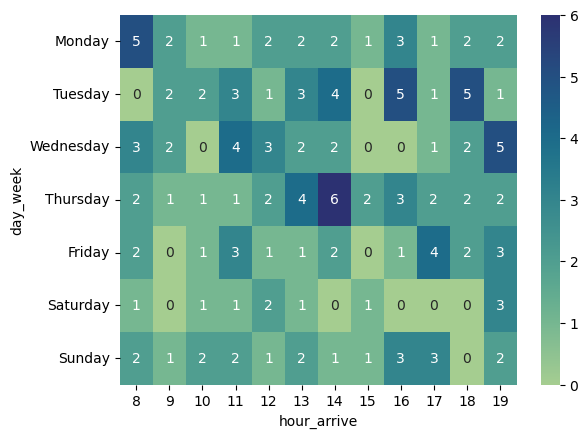

In [52]:
schedule_type('grupo', 'trabajo')

Axes(0.125,0.11;0.62x0.77)


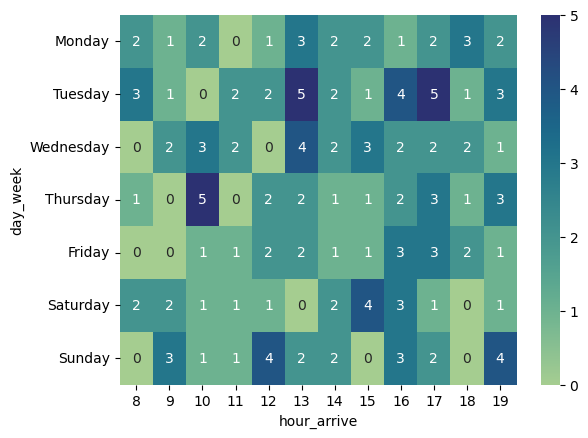

In [46]:
schedule_type('grupo', 'estudio')

Axes(0.125,0.11;0.62x0.77)


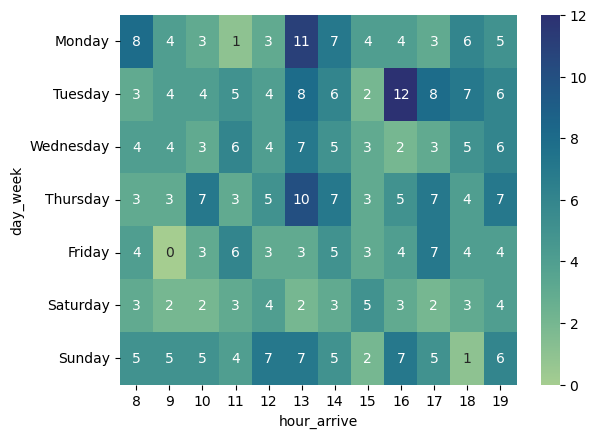

In [53]:
# Vista general del horario de ocupación del tipo de visita 'grupo'
schedule_type('grupo')